### 2. Importing Libraries

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,classification_report

Membaca file extension .csv dan diubah menjadi DataFrame dengan package pandas dan menyimpan di dalam variable berikut:
- df_new_full : data dengan semua contoh (41188) dan 20 fitur. Di sortir berdasarkan tanggal (May 2018 sampai November 2010)
- df_new_lite : data dengan 10% dari dataframe 'df_new_full' yang di ambil secara acak dan memiliki 20 fitur
- df_old_full = data dengan semua contoh (45211) dan 17 fitur. Dataframe ini lebih tua dari 'df_new_full' maka dari itu memiliki fitur yang lebih sedikit namun data lebih banyak
- df_old_lite = data dengan 10% dari dataframe 'df_old_full' yang di ambil secara acak dan memiliki 20 fitur

*data lite dapat digunakan apabila implementasi metode machine learning yang lebih membutuhkan komputasi*

Tujuan dari klasifikasi dari dataset ini adalah untuk melihat apakah client akan berlangganan dalam term deposit. Berikut penjelasan untuk setiap fitur / input dari sumber dataset tersebut

### Input variables:
#### bank client data:
- 1 - age (numeric)
- 2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
- 3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
- 4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
- 5 - default: has credit in default? (categorical: 'no','yes','unknown')
- 6 - housing: has housing loan? (categorical: 'no','yes','unknown')
- 7 - loan: has personal loan? (categorical: 'no','yes','unknown')
#### related with the last contact of the current campaign:
- 8 - contact: contact communication type (categorical: 'cellular','telephone')
- 9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
- 10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
- 11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
#### other attributes:
- 12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
- 13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
- 14 - previous: number of contacts performed before this campaign and for this client (numeric)
- 15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
#### social and economic context attributes
- 16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
- 17 - cons.price.idx: consumer price index - monthly indicator (numeric)
- 18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
- 19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
- 20 - nr.employed: number of employees - quarterly indicator (numeric)
#### Output variable (desired target):
- 21 - y - has the client subscribed a term deposit? (binary: 'yes','no')

### 3. Data Loading

In [2]:
df_new_full = pd.read_csv('bank-additional-full.csv',sep=';')
df_new_lite = pd.read_csv('bank-additional.csv',sep=';')
df_old_full = pd.read_csv('bank-full.csv',sep=';')
df_old_lite = pd.read_csv('bank.csv',sep=';')

In [3]:
df_new_full.head(5).T #Melihat 5 data pertama dalam dataset

,0,1,2,3,4
age,56,57,37,40,56
job,housemaid,services,services,admin.,services
marital,married,married,married,married,married
education,basic.4y,high.school,high.school,basic.6y,high.school
default,no,unknown,no,no,no
housing,no,no,yes,no,no
loan,no,no,no,no,yes
contact,telephone,telephone,telephone,telephone,telephone
month,may,may,may,may,may
day_of_week,mon,mon,mon,mon,mon


### 4. Data Cleaning

#### Melihat Standard dan non-Standard Missing Value

In [4]:
df_new_full.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

Dataframe di atas tidak memiliki standard missing value, lalu saya akan melihat apabila dataframe tersebut memiliki non standard missing value

In [5]:
df_new_full.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


Ketika saya melihat ringkasan dari fitur numerical di dalam dataframe ini, ada nilai yang sangat janggal yaitu di fitur 'pdays' dengan q1,q2,q3, dan max memiliki nilai 999. Dan ketika saya membaca mengenai deskripsi dataset, menjelaskan bahwa dalam fitur 'pdays' apabila memiliki nilai 999, maka client pada sample itu belum pernah di telfon sebelumnya. Dikarenakan nilai '0' memiliki arti yang berbeda dengan '999'. Maka saya akan handling data tersebut nanti ketika sudah memahami lebih dalam

#### Melihat apabila ada outlier dengan metode IQR

In [6]:
Q1 = df_new_full.quantile(0.25)
Q3 = df_new_full.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

age                15.000
duration          217.000
campaign            2.000
pdays               0.000
previous            0.000
emp.var.rate        3.200
cons.price.idx      0.919
cons.conf.idx       6.300
euribor3m           3.617
nr.employed       129.000
dtype: float64


Setelah saya menampung nilai Q1,Q3 dan IQR saya akan melakukan pengecekan mengenai berapa jumlah outlier yang terdeteksi oleh boxplot ini

In [7]:
threshold = 1.5
df_new_full_out = df_new_full[
    ((df_new_full < (Q1 - threshold * IQR)) |(df_new_full > (Q3 + threshold * IQR))).any(axis=1)]

print("jumlah data =", len(df_new_full))
print("jumlah outliers =",len(df_new_full_out))
print("jumlah data setelah di pangkas =",len(df_new_full)-len(df_new_full_out))

jumlah data = 41188
jumlah outliers = 10828
jumlah data setelah di pangkas = 30360


Ternyata, outlier yang di tangkap dengan metode IQR mencakup data sebanyak 10828 atau sekitar 26% dari dataframe tersebut. Dikarenakan data tersebut jauh dari threshold saya (10%) dalam dataset tersebut, maka saya tidak akan melakukan dropping column untuk data-data tersebut

### 5. Exploratory Data Analysis

Pertama-tama, saya ingin melihat visualisasi countplot dari target saya untuk melihat apakah adanya ke tidak seimbangan data (imbalance) atau tidak

<AxesSubplot:xlabel='y', ylabel='count'>

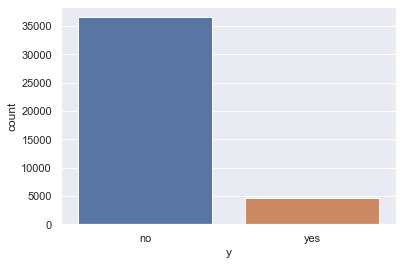

In [8]:
sns.countplot(df_new_full['y'])

In [9]:
count_y=df_new_full['y'].value_counts()
print('Persentase antara nilai target/label :')
print('no :',round(count_y[0]/count_y.sum(),2)*100,'%')
print('yes :',round(count_y[1]/count_y.sum(),2)*100,'%')

Persentase antara nilai target/label :
no : 89.0 %
yes : 11.0 %


Dapat dilihat dari countplot tersebut, data target nya sangat imbalance. Maka, ketika splitting data saya akan menggunakan parameter stratify agar dapat terbagi secara rata ketika pembuatan variabel testing dan training. Lalu saya akan melihat untuk di kolom 'age' dan melihat distribusi dan boxplot nya

#### Numerical Features

<AxesSubplot:xlabel='age'>

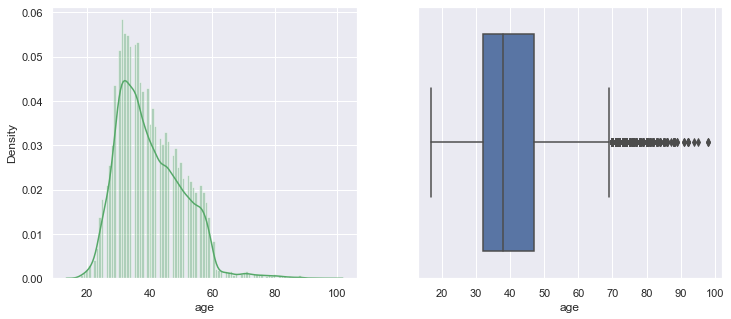

In [10]:
fig = plt.figure(figsize=(12,5)) #penentuan panjang dan lebar figure plot
kolom = 2 #nentuan kolom dalam melakukan plotting
baris = 1 #penentuan baris dalam melakukan plotting
fig.add_subplot(baris,kolom,1)
sns.distplot(df_new_full['age'], color='g', bins=100, hist_kws={'alpha': 0.4})
fig.add_subplot(baris,kolom,2)
sns.boxplot(df_new_full['age'])

In [11]:
thresh_umur = df_new_full[df_new_full['age']>70]
print(thresh_umur.shape[0]) #melihat jumlah data yang memiliki age lebih dari 70
print('Persentase umur diatas 70 :',round(thresh_umur.shape[0]/len(df_new_full)*100,2),'%')

422
Persentase umur diatas 70 : 1.02 %


Dari visualisasi di atas, dapat dilihat bahwa density terbanyak berada di sekitar umur 30-40. Tetapi tetap ada yang berumur 70+ juga tetapi hanya memiliki density yang sangat tipis (1.02% dari total data). Maka dari itu, saya akan melakukan dropping outlier dari fitur Umur pada saat Data Preprocessing

In [12]:
df_new_full[df_new_full['age'] < 70]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41181,37,admin.,married,university.degree,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41182,29,unemployed,single,basic.4y,no,yes,no,cellular,nov,fri,...,1,9,1,success,-1.1,94.767,-50.8,1.028,4963.6,no
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no


Lalu, saya akan melakukan plotting distribusi untuk setiap numerical fitur dalam dataframe ini

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'duration'}>,
        <AxesSubplot:title={'center':'campaign'}>],
       [<AxesSubplot:title={'center':'pdays'}>,
        <AxesSubplot:title={'center':'previous'}>,
        <AxesSubplot:title={'center':'emp.var.rate'}>],
       [<AxesSubplot:title={'center':'cons.price.idx'}>,
        <AxesSubplot:title={'center':'cons.conf.idx'}>,
        <AxesSubplot:title={'center':'euribor3m'}>],
       [<AxesSubplot:title={'center':'nr.employed'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

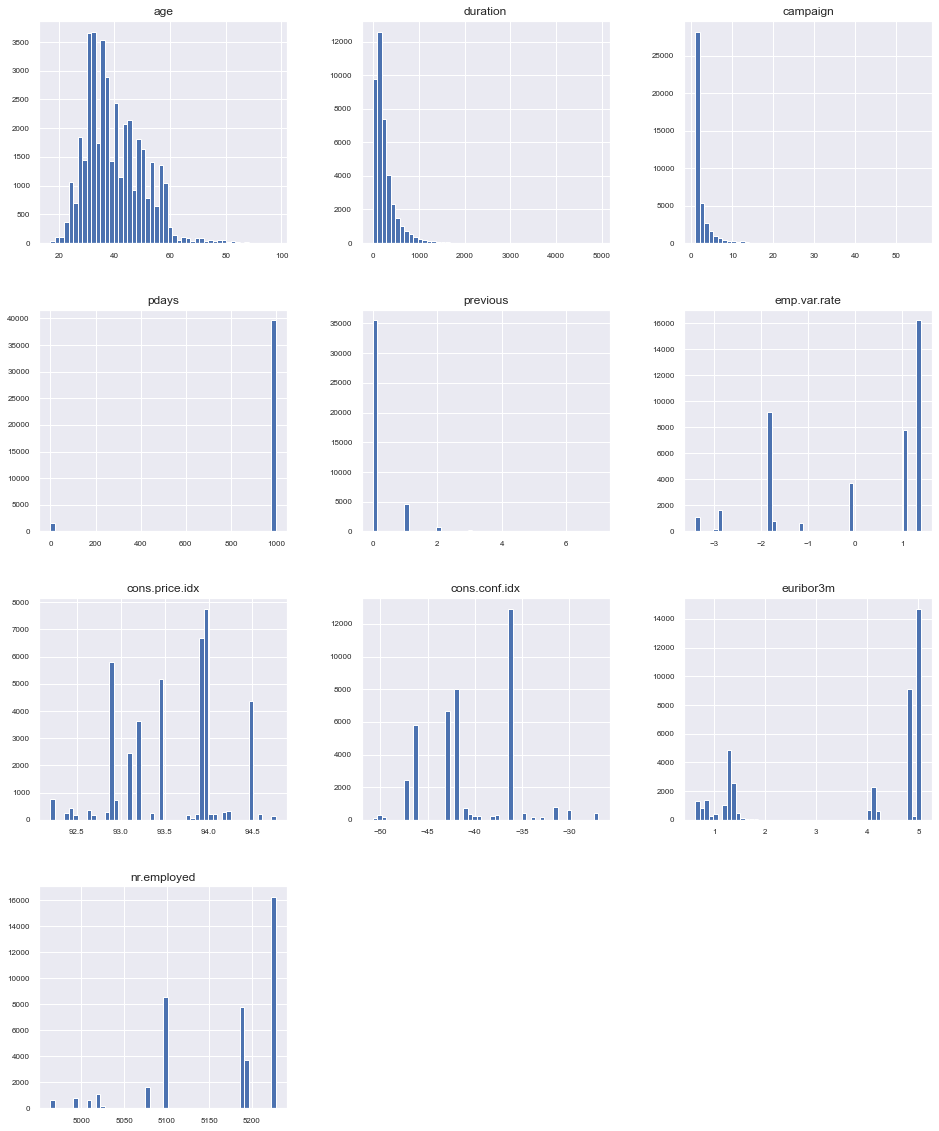

In [13]:
df_numeric = df_new_full.select_dtypes(include='number')
df_numeric.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)

Dapat dilihat dari masing-masing distribusi plot di atas, fitur 'duration' dan 'campaign' memiliki distribusi yang serupa. Dan untuk di bagian pdays memiliki nilai yang sangat tinggi di 999. Maka dapat disimpulkan bahwa, kebanyakan client yang dihubungi pada saat perekaman dataset ini hanya terjadi 1x / belum pernah di hubungi sebelumnya

In [14]:
no_pdays = df_new_full['pdays'][df_new_full['pdays'] == 999]
print('Percentage no pdays : ',round(len(no_pdays)/len(df_new_full) * 100,2),'%')

Percentage no pdays :  96.32 %


Lalu saya akan mengubah value untuk bagian 'pdays' dari yang 999 (belum pernah di hubungi sebelumnya) menjadi -1 agar rentan nilai di bagian pdays tidak ter distorsi. Karena beberapa algoritma machine learning yang ingin saya gunakan disini ada beberapa yang sangat bergantung kepada rumus matematika, keputusan ini menurut saya akan menjadi dampak yang cukup signifikan dalam melakukan klasifikasi data

In [15]:
df_new_full['pdays'].replace({
    999:-1
},inplace=True)

Lalu, saya ingin melihat korelasi terhadap label target di dataset ini yaitu kolom 'y'. Dan dikarenakan function '.corr()' hanya bisa membaca apabila kolom tersebut numeric, maka saya akan melakukan encode label untuk target tersebut terlebih dahulu

In [16]:
df_new_full['y'].replace({
    'no':0,
    'yes':1
},inplace=True)

In [17]:
df_numeric = df_new_full.select_dtypes(include='number') #melakukan select dtypes ulang setelah encode
df_num_corr = df_numeric.corr()['y'][:-1]
df_num_corr=df_num_corr.sort_values(ascending=False)
df_num_corr

duration          0.405274
pdays             0.279025
previous          0.230181
cons.conf.idx     0.054878
age               0.030399
campaign         -0.066357
cons.price.idx   -0.136211
emp.var.rate     -0.298334
euribor3m        -0.307771
nr.employed      -0.354678
Name: y, dtype: float64

Dapat dilihat darikorelasi untuk target di atas, Durasi telfon merupakan faktor dengan korelasi tertinggi dengan senilai 40% untuk korelasi positif. Maka, semakin lama durasi ketika hubungan komunikasi terjadi, semakin besar juga dampaknya untuk berlangganan dalam deposit ke bank tersebut

Lalu, saya ingin melihat korelasi antar fitur

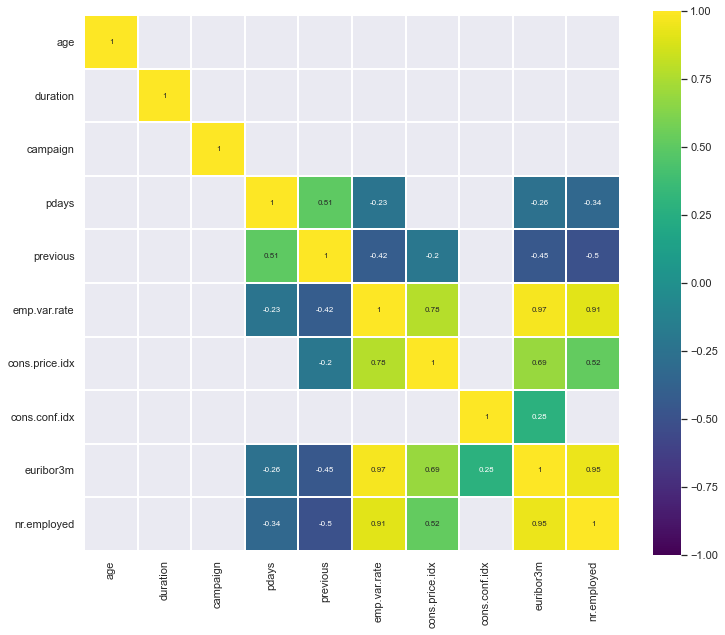

In [18]:
corr = df_numeric.drop('y', axis=1).corr() # Saya drop 'y' karena untuk  melihat antar fitur saja
plt.figure(figsize=(12, 10))
sns.heatmap(corr[(corr >= 0.2) | (corr <= -0.2)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);

Dapat dilihat, korelasi tertinggi ada di fitur social and economic context attributes. seperti euribor (Euro Interbank Offered Rate) kepada emp.var.rate (Employee Variantion Rate), dan nr.employed (number employed) kepada emp.var.rate (Employee Variation Rate) dikarenakan itu adalah status keadaan dari kota bank tersebut

#### Deepdive numeric features untuk target (subscribe)

Visualisasi KDE dengan warna untuk merepresentasikan berlangganan

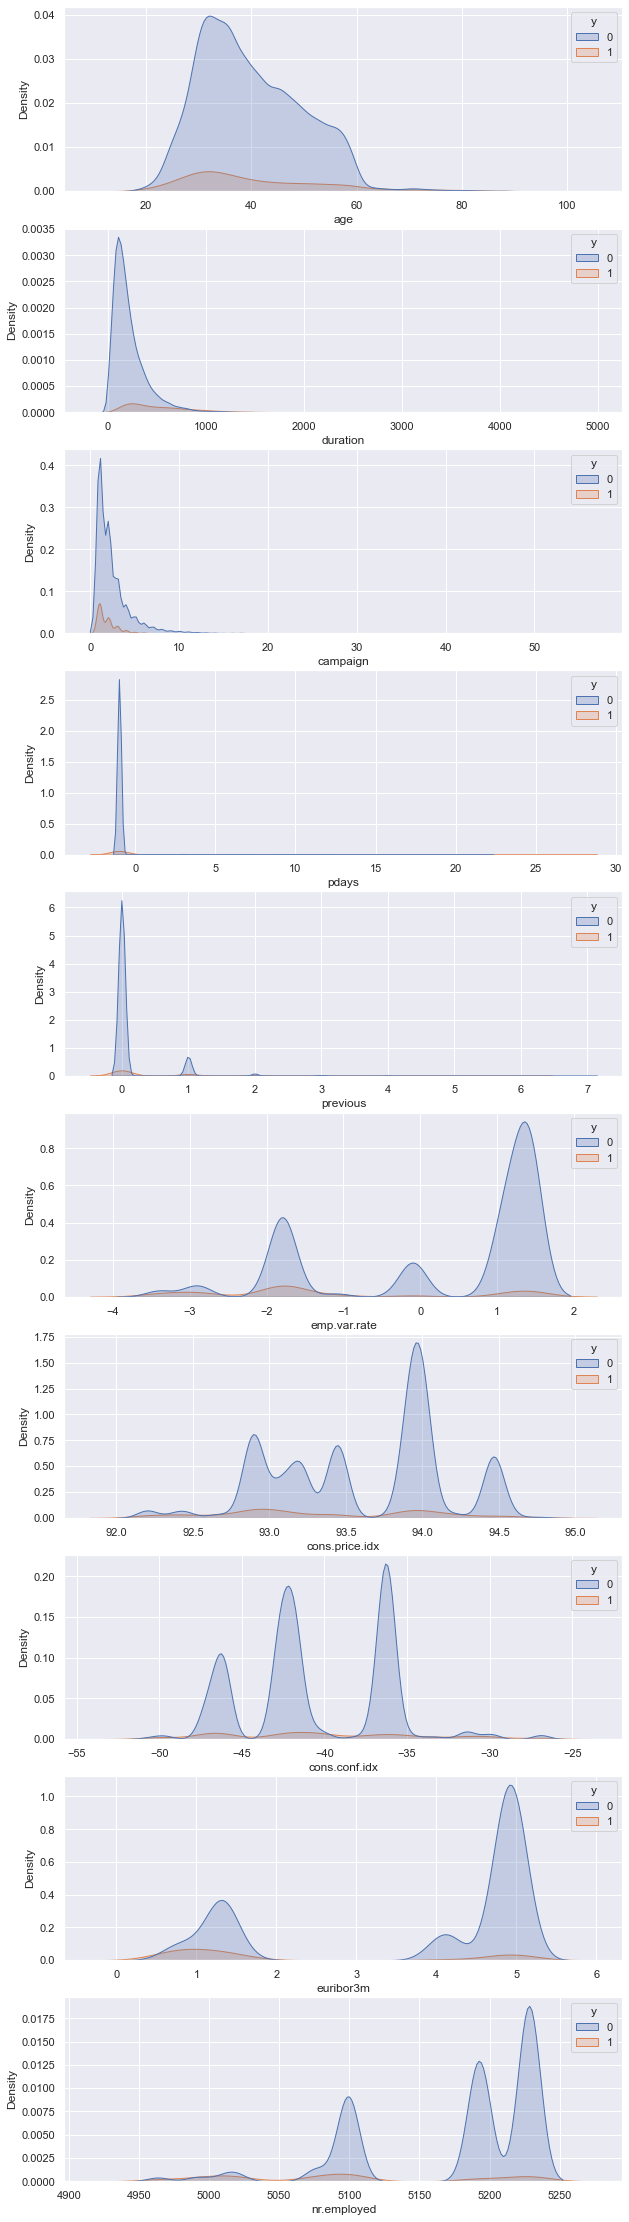

In [19]:
continuous = df_new_full.select_dtypes(include='number')
col = continuous.columns
fig = plt.figure(figsize=(10,40)) #penentuan panjang dan lebar figure plot
kolom = 1 #nentuan kolom dalam melakukan plotting
baris = 10 #penentuan baris dalam melakukan plotting
for i in range (len(col)-1):
    fig.add_subplot(baris,kolom,i+1)
    sns.kdeplot(x=continuous[col[i]],hue='y', data=continuous, fill = True)
plt.show()


lalu saya akan plotting secara spesifik untuk client yang subscribe terhadap term deposit

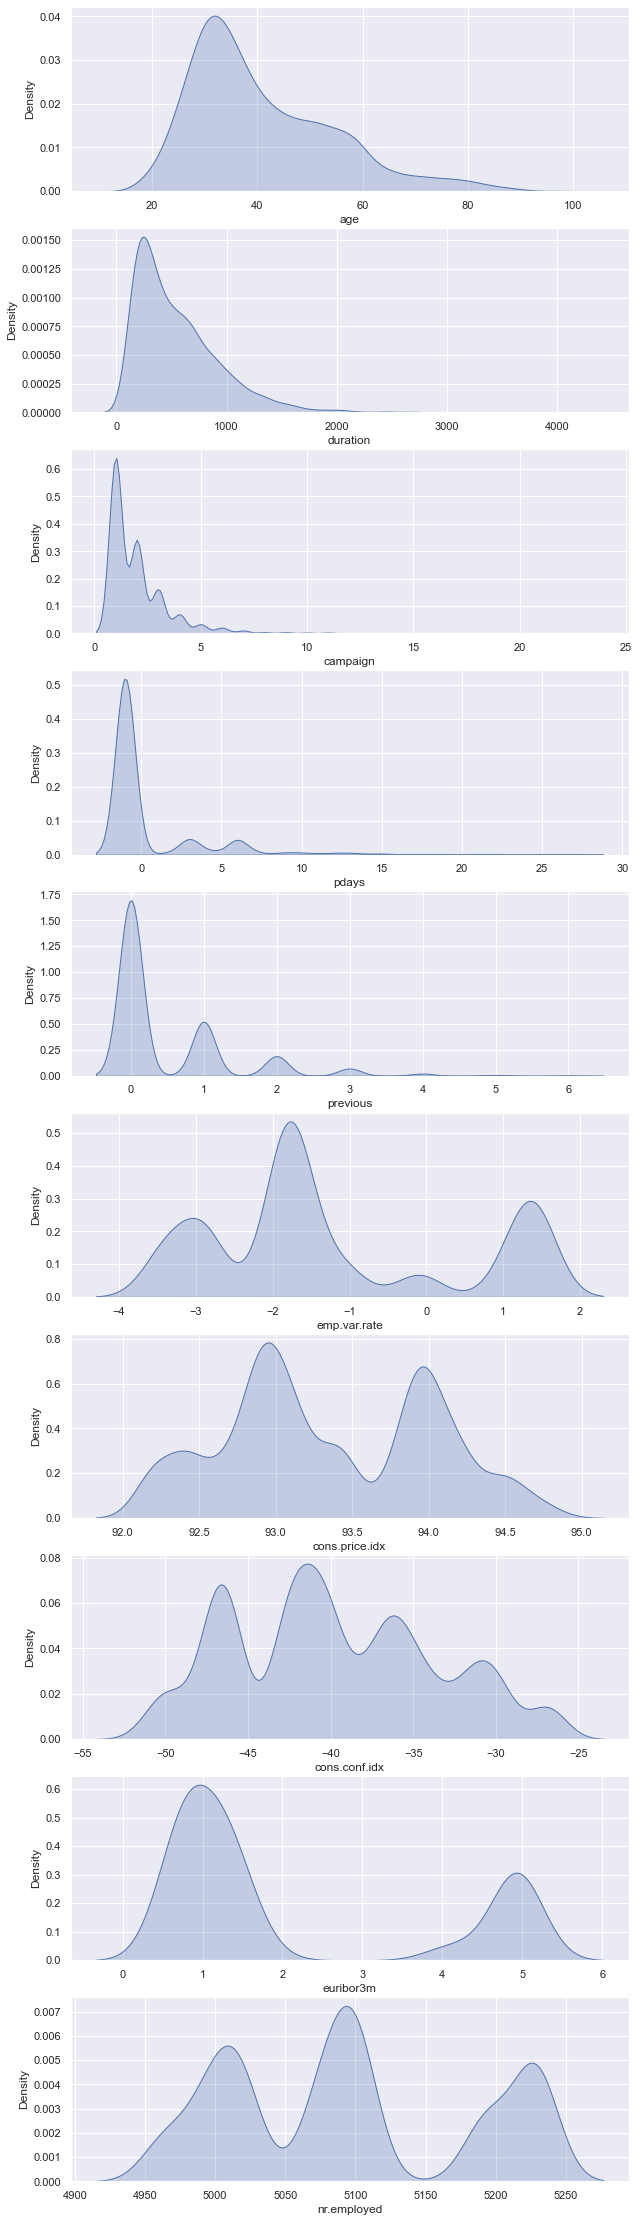

In [20]:
continuous = df_new_full[df_new_full['y'] == 1].select_dtypes(include='number')
col = continuous.columns
fig = plt.figure(figsize=(10,40)) #penentuan panjang dan lebar figure plot
kolom = 1 #nentuan kolom dalam melakukan plotting
baris = 10 #penentuan baris dalam melakukan plotting
for i in range (len(col)-1):
    fig.add_subplot(baris,kolom,i+1)
    sns.kdeplot(x=continuous[col[i]], data=continuous, fill = True)
plt.show()


#### Categorical / Object Features

In [21]:
df_object = df_new_full.select_dtypes(include='object')
df_object.columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome'],
      dtype='object')

#### Countplot untuk masing-masing fitur

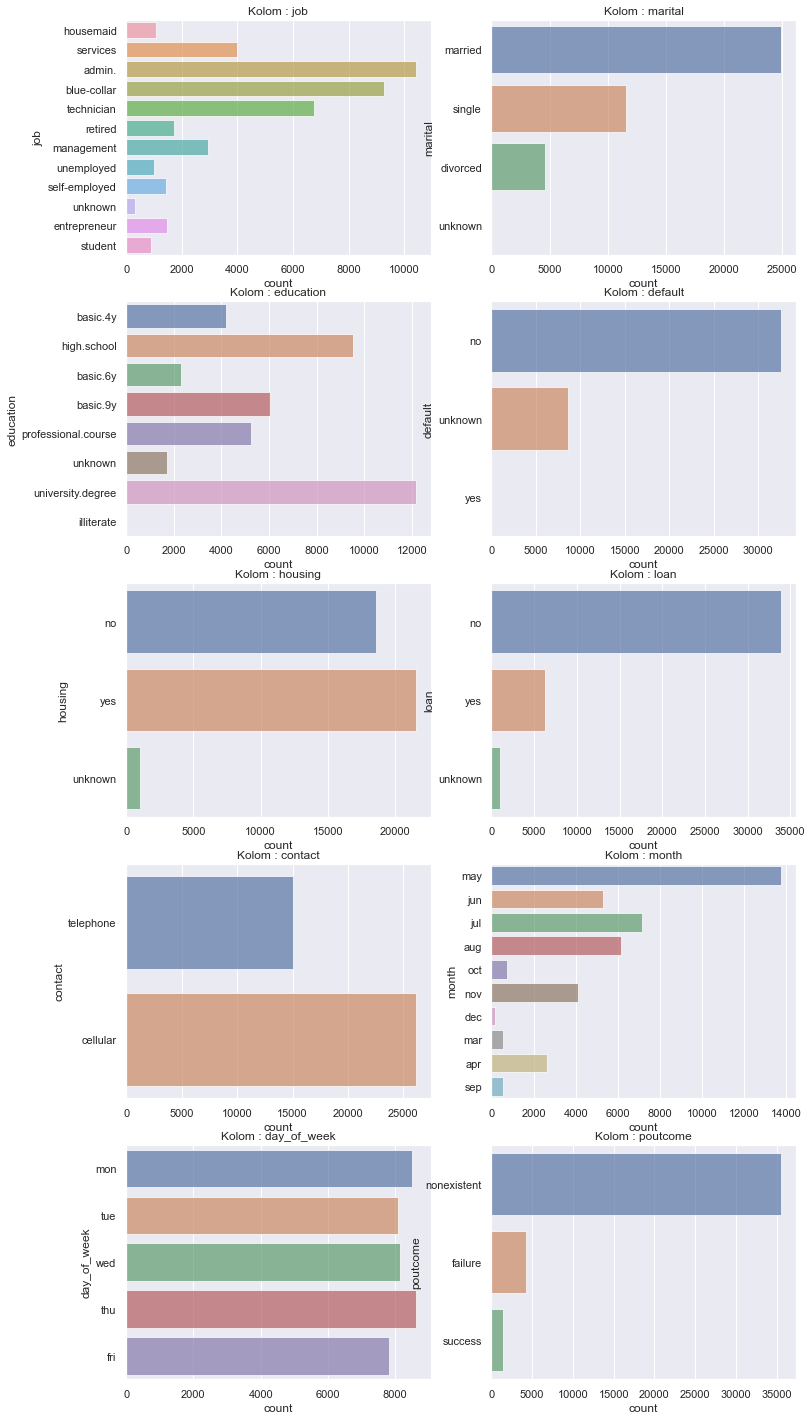

In [22]:
df_object = df_new_full.select_dtypes(include='object')
fig = plt.figure(figsize=(12,25)) #penentuan panjang dan lebar figure plot
kolom = 2 #nentuan kolom dalam melakukan plotting
baris = 5 #penentuan baris dalam melakukan plotting
list_object = df_object.columns
for i in range (10):
    fig.add_subplot(baris, kolom, i+1)
    plt.title("Kolom : "+list_object[i])
    sns.countplot(y=df_object[list_object[i]],alpha=0.7, data=df_object)

Dapat dilihat, banyak juga imbalance data dalam beberapa categorical features seperti 'poutcome','loan' dan 'default'. fitur-fitur ini mungkin tidak begitu relevan untuk model prediksi saya.

#### Deepdive countplot per Fitur untuk subscribe

<AxesSubplot:title={'center':'Subscribed dan punya edukasi terakhir'}, xlabel='count', ylabel='education'>

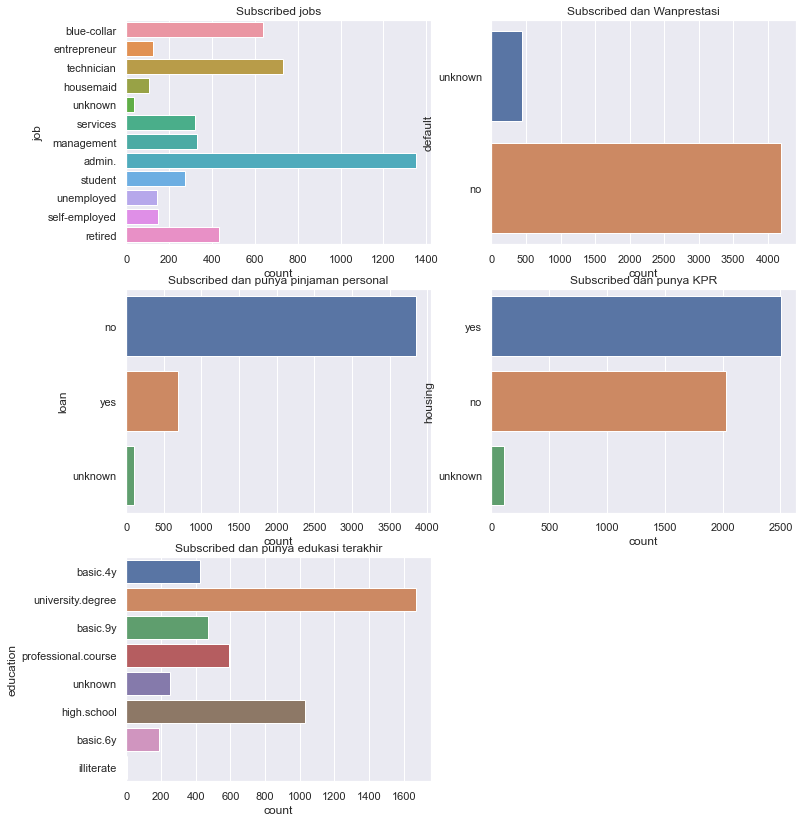

In [23]:
kolom = 2 #nentuan kolom dalam melakukan plotting
baris = 3 #penentuan baris dalam melakukan plotting
fig = plt.figure(figsize=(12,14))

subscribed = df_new_full[df_new_full['y'] == 1]
fig.add_subplot(baris,kolom,1)
plt.title('Subscribed jobs', fontsize=12)
sns.countplot(y='job',alpha=1, data=subscribed)

fig.add_subplot(baris,kolom,2)
plt.title('Subscribed dan Wanprestasi',fontsize=12)
sns.countplot(y='default',alpha=1, data=subscribed)

fig.add_subplot(baris,kolom,3)
plt.title('Subscribed dan punya pinjaman personal',fontsize=12)
sns.countplot(y='loan',alpha=1, data=subscribed)

fig.add_subplot(baris,kolom,4)
plt.title('Subscribed dan punya KPR',fontsize=12)
sns.countplot(y='housing',alpha=1, data=subscribed)

fig.add_subplot(baris,kolom,5)
plt.title('Subscribed dan punya edukasi terakhir',fontsize=12)
sns.countplot(y='education',alpha=1, data=subscribed)

Dapat disimpulkan dari graph di atas bahwa:
- Nasabah yang banyak menyetujui dalam langganan deposito bekerja dalam bidang Administrasi
- Nasabah yang banyak berlangganan tidak pernah gagal bayar hutang 
- Nasabah mayoritas tidak memiliki pinjaman personal ketika berlangganan. Tetapi ada juga sedikit yang memiliki hutang personal dan berlangganan
- Nasabah yang sedang melakukan Kredit Pembangunan Rumah memiliki persentase lebih banyak dalam berlangganan daripada yang sedang tidak KPR.


### 6. Data Preprocessing

Melakukan dropping outlier dalam fitur umur yang lebih dari 70

In [24]:
df_new_full = df_new_full[df_new_full['age'] < 70]
df_new_full.shape

(40719, 21)

Lalu, saya juga akan melakukan dropping data yang memiliki value dengan jumlah data yang sangat kecil sesuai dari data yang sudah saya plotting di EDA. Saya akan menampilkan data yang memiliki unique value dibawah 1%

In [25]:
list_cat = df_new_full.select_dtypes(include='object').columns
for i in range (len(list_cat)):
    if df_new_full[list_cat[i]].value_counts().sort_values(ascending=True)[0]/len(df_new_full) < 0.01:
        print('Column:',list_cat[i])
        print('value',df_new_full[list_cat[i]].value_counts().sort_values(ascending=True).index[0],':',
              df_new_full[list_cat[i]].value_counts().sort_values(ascending=True)[0])
        print('percentage :',
              round(df_new_full[list_cat[i]].value_counts().sort_values(ascending=True)[0]/len(df_new_full) * 100,2),'%')
        print('')

Column: job
value unknown : 324
percentage : 0.8 %

Column: marital
value unknown : 80
percentage : 0.2 %

Column: education
value illiterate : 17
percentage : 0.04 %

Column: default
value yes : 3
percentage : 0.01 %

Column: month
value dec : 160
percentage : 0.39 %



Dikarenakan bulan sangat dibutuhkan disini, maka saya tidak akan drop value 'dec' dalam fitur 'month' agar tidak merusak kemurnian data nya. Dan juga untuk default dikarenakan menurut saya nilai 'yes' dalam fitur tersebut sangat dibutuhkan dari dataset ini

In [26]:
df_new_full.shape

(40719, 21)

In [27]:
df_new_full = df_new_full[
    (df_new_full['job'] != 'unknown') &
    (df_new_full['marital'] != 'unknown') &
    (df_new_full['education'] != 'illiterate')
]

In [28]:
df_new_full.shape

(40307, 21)

Lalu, saya akan menyimpan dataframe tersebut menjadi file .csv untuk membantu ketika deployment agar tidak usah membuat class atau handling value dari pipeline lagi.

In [29]:
df_new_full.to_csv('bank-additional-full-cleaned.csv', index=False)

#### Splitting features & label

In [30]:
df_new_full.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,-1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,-1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,-1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,-1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,-1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


In [31]:
X  = df_new_full.drop('y',axis=1)
y = df_new_full['y']

Lalu untuk bagian label, saya ingin memisahkan bagian yang nominal, dan yang ordinal.

In [32]:
X.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,-1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,-1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,-1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,-1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,-1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0


In [33]:
X_nominal = X[['job','marital','default','housing','loan','contact','poutcome']]
X_ordinal = X[['day_of_week','month','education']]

#### Label Encoding untuk ordinal

In [34]:
X['month'].replace({
    'jan':1,'feb':2,'mar':3,'apr':4,'may':5,'jun':6,'jul':7,'aug':8,'sep':9,
    'oct':10,'nov':11,'dec':12
},inplace=True)

X['day_of_week'].replace({
    'mon':1,'tue':2,'wed':3,'thu':4,'fri':5,'sat':6,'sun':7
},inplace=True)

X['education'].replace({
    'unknown':1,'basic.4y':2,'basic.6y':3,'basic.9y':4,'high.school':5,
            'university.degree':6,'professional.course':7
},inplace=True)

Sisanya akan dilakukan dengan melakukan One Hot Encoding dari pipeline

#### Melakukan train dan test split

Melakukan splitting untuk train dan test dengan jumlah Train 80% dan Test 20%. Tapi dikarenakan adanya imbalance data untuk target nya maka saya akan menggunakan parameter stratify split agar jumlah persentase antar value tetap sama di bagian training dan testing

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42, stratify=y)

In [36]:
 print('Persentase Tidak Berlangganan (Training) :',
      round(y_train.value_counts()[0]/y_train.value_counts().sum()*100,2),'%')
print('Persentase  Berlangganan (Training) :',
      round(y_train.value_counts()[1]/y_train.value_counts().sum()*100,2),'%')
print('Persentase Tidak Berlangganan (Testing) :',
      round(y_test.value_counts()[0]/y_test.value_counts().sum()*100,2),'%')
print('Persentase Berlangganan (Testing) :',
      round(y_test.value_counts()[1]/y_test.value_counts().sum()*100,2),'%')

Persentase Tidak Berlangganan (Training) : 89.15 %
Persentase  Berlangganan (Training) : 10.85 %
Persentase Tidak Berlangganan (Testing) : 89.15 %
Persentase Berlangganan (Testing) : 10.85 %


#### Melakukan scaling data

Saya melakukan scaling data setelah dilakukan splitting train/test agar menghindari data leakage seperti yang dapat di baca dari artikel disini : [MachineLearningMastery](https://machinelearningmastery.com/data-preparation-without-data-leakage/)

In [37]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder


num_features = X_train.select_dtypes(include='number').columns
cat_features = X_train.select_dtypes(include='object').columns

full_pipeline = ColumnTransformer([
    ('num', StandardScaler(), num_features),
    ('cat', OneHotEncoder(), cat_features),
])
X_prepared = full_pipeline.fit_transform(X_train)

In [38]:
X_prepared

array([[-0.26471022,  0.70480591, -0.29438856, ...,  0.        ,
         1.        ,  0.        ],
       [-0.16119719,  1.32111686,  2.16980314, ...,  0.        ,
         1.        ,  0.        ],
       [-0.36822325, -2.37674887, -0.78722691, ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [-0.05768416, -0.527816  , -0.78722691, ...,  0.        ,
         1.        ,  0.        ],
       [-0.47173628,  0.70480591, -1.28006525, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.56339402,  0.70480591,  0.19844978, ...,  0.        ,
         1.        ,  0.        ]])

### Memilih dan training model

#### Logistic Regression

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from time import time
t0=time()
logreg = LogisticRegression(random_state=42)
logreg.fit(X_prepared,y_train)
y_pred = logreg.predict(X_prepared)
print("Accuracy: ",metrics.accuracy_score(y_train, y_pred)*100)
print('Confusion Matrix:')
print(confusion_matrix(y_train, y_pred))
print(classification_report(y_train, y_pred))

print('Time:',time() - t0)

Accuracy:  91.26066056752985
Confusion Matrix:
[[28043   702]
 [ 2116  1384]]
              precision    recall  f1-score   support

           0       0.93      0.98      0.95     28745
           1       0.66      0.40      0.50      3500

    accuracy                           0.91     32245
   macro avg       0.80      0.69      0.72     32245
weighted avg       0.90      0.91      0.90     32245

Time: 0.2981727123260498


Untuk Logistic Regression, hasil dari predict untuk training set tersebut memiliki akurasi di 91%. Saya akan mencoba untuk melihat nilai dari rata-rata cross validation untuk Logistic Regression

In [40]:
from sklearn.model_selection import cross_val_score
lr_cv = cross_val_score(logreg, X_prepared, y_train,scoring='accuracy', cv=5)
print(lr_cv)
print('Rata-rata akurasi ',lr_cv.mean())
lr_cv.mean()

[0.91425027 0.91331989 0.90928826 0.90727245 0.91626609]
Rata-rata akurasi  0.9120793921538224


0.9120793921538224

Dan ternyata, hasil rata-rata dari Cross Validation Score nya juga tinggi yaitu menyentuh di 91% Akurasi. Classifier Logistic Regression sangat bagus dalam menyelesaikan permasalahan Binary Classification. Tapi, tidak begitu bagus ketika bertemu dengan multi class problem. Maka dari itu, Hasil dari Logistic Regression untuk kasus ini cukup bagus dikarenakan kasus ini adalah binary classification

#### SVM

Untuk SVM, Dikarenakan komputasi nya tergolong lama maka saya akan menggunakan sampling sebanyak 10% dari data X_prepared dan y_train

In [41]:
X_new = pd.DataFrame(X_prepared).copy()
X_new['y'] = y_train.values
X_new = X_new.sample(frac=0.1,random_state=42)
y_new = X_new['y']
X_new.drop('y',axis=1,inplace=True)

In [42]:
X_new.shape

(3224, 41)

In [43]:
y_new.shape

(3224,)

##### Kernel Linear

In [44]:
from sklearn.svm import SVC
t0=time()
svm_lin = SVC(kernel='linear',random_state=42)
svm_lin.fit(X_new,y_new)
y_pred = svm_lin.predict(X_new)
print("Accuracy: ",metrics.accuracy_score(y_new, y_pred)*100)
print('Confusion Matrix:')
print(confusion_matrix(y_new, y_pred))
print(classification_report(y_new, y_pred))

print('Time:',time() - t0)

Accuracy:  89.64019851116626
Confusion Matrix:
[[2806   38]
 [ 296   84]]
              precision    recall  f1-score   support

           0       0.90      0.99      0.94      2844
           1       0.69      0.22      0.33       380

    accuracy                           0.90      3224
   macro avg       0.80      0.60      0.64      3224
weighted avg       0.88      0.90      0.87      3224

Time: 0.35009765625


In [45]:
svm_lin_cv = cross_val_score(svm_lin, X_new, y_new,scoring='accuracy', cv=5)
print(svm_lin_cv)
print('Rata-rata akurasi ',svm_lin_cv.mean())

[0.90387597 0.89612403 0.89612403 0.88837209 0.88819876]
Rata-rata akurasi  0.8945389763589965


##### Kernel Radial Basis Function

In [46]:
t0=time()
svm_rbf = SVC(kernel='rbf',random_state=42)
svm_rbf.fit(X_new,y_new)
y_pred = svm_rbf.predict(X_new)
print("Accuracy: ",metrics.accuracy_score(y_new, y_pred)*100)
print('Confusion Matrix:')
print(confusion_matrix(y_new, y_pred))
print(classification_report(y_new, y_pred))

print('Time:',time() - t0)

Accuracy:  92.77295285359801
Confusion Matrix:
[[2817   27]
 [ 206  174]]
              precision    recall  f1-score   support

           0       0.93      0.99      0.96      2844
           1       0.87      0.46      0.60       380

    accuracy                           0.93      3224
   macro avg       0.90      0.72      0.78      3224
weighted avg       0.92      0.93      0.92      3224

Time: 0.2732667922973633


In [47]:
svm_rbf_cv = cross_val_score(svm_rbf, X_new, y_new,scoring='accuracy', cv=5)
print(svm_rbf_cv)
print('Rata-rata akurasi ',svm_rbf_cv.mean())

[0.90697674 0.89302326 0.90697674 0.90077519 0.89285714]
Rata-rata akurasi  0.9001218161683278


##### Kernel Polynomial

In [48]:
t0=time()
svm_poly = SVC(kernel='poly',random_state=42)
svm_poly.fit(X_new,y_new)
y_pred = svm_poly.predict(X_new)
print("Accuracy: ",metrics.accuracy_score(y_new, y_pred)*100)
print('Confusion Matrix:')
print(confusion_matrix(y_new, y_pred))
print(classification_report(y_new, y_pred))

print('Time:',time() - t0)

Accuracy:  94.29280397022333
Confusion Matrix:
[[2827   17]
 [ 167  213]]
              precision    recall  f1-score   support

           0       0.94      0.99      0.97      2844
           1       0.93      0.56      0.70       380

    accuracy                           0.94      3224
   macro avg       0.94      0.78      0.83      3224
weighted avg       0.94      0.94      0.94      3224

Time: 0.22536754608154297


In [49]:
svm_poly_cv = cross_val_score(svm_poly, X_new, y_new,scoring='accuracy', cv=5)
print(svm_poly_cv)
print('Rata-rata akurasi ',svm_poly_cv.mean())

[0.89612403 0.88837209 0.90387597 0.90077519 0.88975155]
Rata-rata akurasi  0.8957797679233472


##### Kernel Sigmoid

In [50]:
t0=time()
svm_sigmoid = SVC(kernel='sigmoid',random_state=42)
svm_sigmoid.fit(X_new,y_new)
y_pred = svm_sigmoid.predict(X_new)
print("Accuracy: ",metrics.accuracy_score(y_new, y_pred)*100)
print('Confusion Matrix:')
print(confusion_matrix(y_new, y_pred))
print(classification_report(y_new, y_pred))

print('Time:',time() - t0)

Accuracy:  86.9727047146402
Confusion Matrix:
[[2670  174]
 [ 246  134]]
              precision    recall  f1-score   support

           0       0.92      0.94      0.93      2844
           1       0.44      0.35      0.39       380

    accuracy                           0.87      3224
   macro avg       0.68      0.65      0.66      3224
weighted avg       0.86      0.87      0.86      3224

Time: 0.19747114181518555


In [51]:
svm_sigmoid_cv = cross_val_score(svm_sigmoid, X_new, y_new,scoring='accuracy', cv=5)
print(svm_sigmoid_cv)
print('Rata-rata akurasi ',svm_sigmoid_cv.mean())

[0.89147287 0.87131783 0.8744186  0.87596899 0.87888199]
Rata-rata akurasi  0.8784120564302567


Dari Classifier SVM kernel yang paling optimal jika dilihat dari metric Accuracy adalah RBF. Perbedaan antara nilai prediksi ke training data dan cross validation score.
- Accuracy to train (92%)
- Accuracy to test (90%)

#### Decision Tree

In [52]:
from sklearn.tree import DecisionTreeClassifier
t0=time()
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_prepared,y_train)
y_pred = dt.predict(X_prepared)
print("Accuracy: ",metrics.accuracy_score(y_train, y_pred)*100)
print('Confusion Matrix:')
print(confusion_matrix(y_train, y_pred))
print(classification_report(y_train, y_pred))

print('Time:',time() - t0)

Accuracy:  100.0
Confusion Matrix:
[[28745     0]
 [    0  3500]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28745
           1       1.00      1.00      1.00      3500

    accuracy                           1.00     32245
   macro avg       1.00      1.00      1.00     32245
weighted avg       1.00      1.00      1.00     32245

Time: 0.24235272407531738


Untuk classifier Decision Tree, akurasi nya menyentuh 100% ketika melakukan prediksi terhadap training data. Hasil tersebut cenderung overfit dikarenakan tidak melakukan prediksi terhadap data validasi, Maka dari itu saya akan mencoba untuk melihat nilai cross validation score nya juga

In [53]:
dt_cv = cross_val_score(dt, X_prepared, y_train,scoring='accuracy', cv=5)
print(dt_cv)
print('Rata-rata akurasi ',dt_cv.mean())
dt_cv.mean()

[0.89254148 0.89486742 0.88385796 0.88897503 0.88850985]
Rata-rata akurasi  0.889750348891301


0.889750348891301

Dan ternyata, ketika melakukan validasi dengan menggunakan K-Fold = 5, hasil Decision Tree jauh menurun sehingga 89%. Hal terseebut dikarenakan Decision Tree merupakan classifier yang cenderung sering terjadi overfit dikarenakan tree based apabila hanya menggunakan 1 tree dan hampir tidak memiliki aset randomness didalamnya akan selalu cenderung overfit. Dalam penyelesaian kasus overfit didalam Decision Tree, saya akan mencoba implementasi classifier Random Forest Classifier

#### Random Forest Classifier

In [54]:
from sklearn.ensemble import RandomForestClassifier
t0=time()
rf = RandomForestClassifier(random_state=42)
rf.fit(X_prepared,y_train)
y_pred = rf.predict(X_prepared)
print("Accuracy: ",metrics.accuracy_score(y_train, y_pred)*100)
print('Confusion Matrix:')
print(confusion_matrix(y_train, y_pred))
print(classification_report(y_train, y_pred))

print('Time:',time() - t0)

Accuracy:  100.0
Confusion Matrix:
[[28745     0]
 [    0  3500]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28745
           1       1.00      1.00      1.00      3500

    accuracy                           1.00     32245
   macro avg       1.00      1.00      1.00     32245
weighted avg       1.00      1.00      1.00     32245

Time: 3.0139153003692627


Tampaknya Random Forest dengan parameter default juga overfit, Randomness tidak begitu cukup untuk menyelesaikan kasus overfit dalam classifier ini. Saya akan mencoba untuk melihat hasil dari validasi di cross validation dengan K-Fold = 5

In [55]:
rf_cv = cross_val_score(rf, X_prepared, y_train,scoring='accuracy', cv=5)
print(rf_cv)
print('Rata-rata akurasi ',rf_cv.mean())


[0.91409521 0.9145604  0.9116142  0.91223445 0.91394015]
Rata-rata akurasi  0.9132888819972089


Tetapi, hasil dari validasi tersebut memiliki nilai akurasi yang lebih tinggi di banding Decision Tree dengan senilai 91.3% . Maka dari itu, dapat di konklusikan bahwa Random Forest masih memiliki opsi yang lebih baik dibandingkan dengan Decision Tree

#### K-Nearest Neighbor

In [56]:
from sklearn.neighbors import KNeighborsClassifier
t0 = time()
knn = KNeighborsClassifier()
knn.fit(X_prepared,y_train)
y_pred = knn.predict(X_prepared)
print("Accuracy: ",metrics.accuracy_score(y_train, y_pred)*100)
print('Confusion Matrix:')
print(confusion_matrix(y_train, y_pred))
print(classification_report(y_train, y_pred))

print('Time:',time() - t0)

Accuracy:  93.18654054892231
Confusion Matrix:
[[28112   633]
 [ 1564  1936]]
              precision    recall  f1-score   support

           0       0.95      0.98      0.96     28745
           1       0.75      0.55      0.64      3500

    accuracy                           0.93     32245
   macro avg       0.85      0.77      0.80     32245
weighted avg       0.93      0.93      0.93     32245

Time: 41.747955322265625


Untuk K-Nearest Neighbor memiliki nilai akurasi 93% untuk melakukan prediksi terhadap data training nya, Saya akan mencoba untuk melihat nilai dari cross validation apabila K-Fold = 5

In [57]:
knn_cv = cross_val_score(knn, X_prepared, y_train,scoring='accuracy', cv=5)
print(knn_cv)
print('Rata-rata akurasi ',knn_cv.mean())


[0.90572182 0.90153512 0.90711738 0.90541169 0.9049465 ]
Rata-rata akurasi  0.9049465033338502


Nilai validasi dari k-nn dengan k-fold 5 adalah 90%. Berbeda 3% dari nilai prediksi terhadap training data tersebut

#### XGBoost Classifier

In [58]:
from xgboost import XGBClassifier

t0 = time()
xg = XGBClassifier(random_state=42, verbosity = 0) #verbosity untuk ignore warning
xg.fit(X_prepared,y_train)
y_pred = xg.predict(X_prepared)
print("Accuracy: ",metrics.accuracy_score(y_train, y_pred)*100)
print('Confusion Matrix:')
print(confusion_matrix(y_train, y_pred))
print(classification_report(y_train, y_pred))

print('Time:',time() - t0)

Accuracy:  96.34361916576214
Confusion Matrix:
[[28400   345]
 [  834  2666]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     28745
           1       0.89      0.76      0.82      3500

    accuracy                           0.96     32245
   macro avg       0.93      0.87      0.90     32245
weighted avg       0.96      0.96      0.96     32245

Time: 1.331644058227539


Nilai akurasi dari XGBoost dengan prediksi training datanya adalah 96%. Lalu saya akan melihat nilai dari cross validation apabila K-Fold = 5

In [59]:
xg_cv = cross_val_score(xg, X_prepared, y_train,scoring='accuracy', cv=5)
print(xg_cv)
print('Rata-rata akurasi ',xg_cv.mean())


[0.9158009  0.91502559 0.91192433 0.91688634 0.92045278]
Rata-rata akurasi  0.9160179872848504


Nilai cross validation dari XGBoost adalah 91%. berbeda 5% dari nilai akurasi ketika melakukan validasi terhadap data training (96%).

#### Perbandingan antar Classifier

In [60]:
dict_clf = {
    'Decision Tree':dt_cv.mean(),
    'Random Forest':rf_cv.mean(),
    'Logistic Regression':lr_cv.mean(),
    'SVM Linear': svm_lin_cv.mean(),
    'SVM RBF':svm_rbf_cv.mean(),
    'SVM Poly':svm_poly_cv.mean(),
    'SVM Sigmoid':svm_sigmoid_cv.mean(),
    'K-Nearest Neighbor': knn_cv.mean(),
    'XGBoost':xg_cv.mean()
}
clf_cv = pd.DataFrame(dict_clf,index=['Cross Validation Score'])

In [61]:
clf_cv.T

,Cross Validation Score
Decision Tree,0.889750
Random Forest,0.913289
Logistic Regression,0.912079
SVM Linear,0.894539
SVM RBF,0.900122
SVM Poly,0.895780
SVM Sigmoid,0.878412
K-Nearest Neighbor,0.904947
XGBoost,0.916018


In [62]:
clf_cv

,Decision Tree,Random Forest,Logistic Regression,SVM Linear,SVM RBF,SVM Poly,SVM Sigmoid,K-Nearest Neighbor,XGBoost
Cross Validation Score,0.88975,0.913289,0.912079,0.894539,0.900122,0.89578,0.878412,0.904947,0.916018


<AxesSubplot:title={'center':'Hasil rata-rata Cross Validation Score'}, xlabel='Cross Validation Score'>

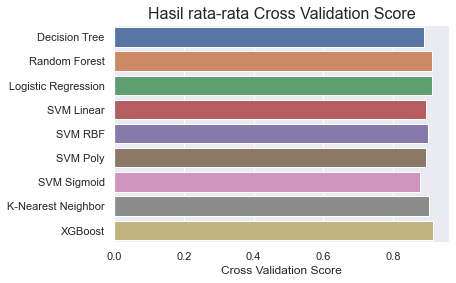

In [63]:
plt.title('Hasil rata-rata Cross Validation Score',fontsize=16)
sns.barplot(x=clf_cv.T['Cross Validation Score'],y=clf_cv.T.index)

Dari graph di atas, dapat dilihat bahwa XGBoost memiliki nilai rata-rata dari Cross Validation Accuracy score tertinggi, maka saya akan melakukan hyper parameter tuning berdasarkan classifier tersebut

### Hyperparameter Tuning (GridSearchCV)

In [64]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50,100,125],
    'learning_rate': [0.1, 0.05, 0.01],
    'min_child_weight': [1,2,3],
    'subsample': [0.1,0.3,0.5],
    'colsample_bytree': [0.5,0.8]
}

xg_hyp = XGBClassifier(objective= 'binary:logistic',random_state=42)
grid_search = GridSearchCV(estimator = xg_hyp, #classifier = Xtreme Gradient boost
                           param_grid = param_grid, #mengambil grid parameter yang di atas
                           cv=5, #k-fold = 5
                           n_jobs=-1, #pemakaian komputasi
                          verbose=2, #verbose training hyp tuning
                          )
grid_search.fit(X_prepared,y_train)
print(grid_search.best_params_)

Fitting 5 folds for each of 162 candidates, totalling 810 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   13.3s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 624 tasks      | elapsed:  6.9min
[Parallel(n_jobs=-1)]: Done 810 out of 810 | elapsed:  9.2min finished


{'colsample_bytree': 0.8, 'learning_rate': 0.1, 'min_child_weight': 2, 'n_estimators': 50, 'subsample': 0.5}


In [65]:
df_hasil = pd.DataFrame(grid_search.cv_results_)
df_hasil.sort_values(by='rank_test_score',ascending=True,inplace=True)
df_hasil.head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_colsample_bytree,param_learning_rate,param_min_child_weight,param_n_estimators,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
92,5.573495,0.055531,0.011969,0.000631,0.8,0.1,2,50,0.5,"{'colsample_bytree': 0.8, 'learning_rate': 0.1...",0.922779,0.921228,0.915181,0.917972,0.920763,0.919584,0.002694,1
35,11.433024,0.072887,0.015958,0.001092,0.5,0.05,1,125,0.5,"{'colsample_bytree': 0.5, 'learning_rate': 0.0...",0.922003,0.919212,0.915181,0.918902,0.922314,0.919522,0.002580,2
14,7.559982,0.048391,0.013963,0.000630,0.5,0.1,2,100,0.5,"{'colsample_bytree': 0.5, 'learning_rate': 0.1...",0.922934,0.917662,0.915336,0.919522,0.920918,0.919274,0.002618,3
5,7.521485,0.037330,0.013564,0.001353,0.5,0.1,1,100,0.5,"{'colsample_bytree': 0.5, 'learning_rate': 0.1...",0.921538,0.919057,0.912855,0.920453,0.922314,0.919243,0.003377,4
134,12.678294,0.129139,0.014761,0.000746,0.8,0.05,3,125,0.5,"{'colsample_bytree': 0.8, 'learning_rate': 0.0...",0.919833,0.920763,0.915801,0.917507,0.922158,0.919212,0.002281,5
125,13.340125,0.164643,0.014364,0.000800,0.8,0.05,2,125,0.5,"{'colsample_bytree': 0.8, 'learning_rate': 0.0...",0.922934,0.919833,0.915026,0.916421,0.921383,0.919119,0.002974,6
95,10.153846,0.071081,0.014165,0.000750,0.8,0.1,2,100,0.5,"{'colsample_bytree': 0.8, 'learning_rate': 0.1...",0.922314,0.918747,0.913940,0.919212,0.921383,0.919119,0.002909,6
116,13.228822,0.177007,0.015359,0.001017,0.8,0.05,1,125,0.5,"{'colsample_bytree': 0.8, 'learning_rate': 0.0...",0.922469,0.919367,0.914871,0.917196,0.921538,0.919088,0.002788,8
82,5.134469,0.168991,0.013564,0.001850,0.8,0.1,1,50,0.3,"{'colsample_bytree': 0.8, 'learning_rate': 0.1...",0.922314,0.919677,0.913630,0.919522,0.920298,0.919088,0.002905,9
23,7.518494,0.023378,0.013564,0.001018,0.5,0.1,3,100,0.5,"{'colsample_bytree': 0.5, 'learning_rate': 0.1...",0.920918,0.918902,0.915336,0.918592,0.921693,0.919088,0.002213,9


In [66]:
grid_search.best_params_

{'colsample_bytree': 0.8,
 'learning_rate': 0.1,
 'min_child_weight': 2,
 'n_estimators': 50,
 'subsample': 0.5}

In [67]:
t0 = time()
xg = XGBClassifier(colsample_bytree=0.8,learning_rate=0.1,
                   min_child_weight = 2, n_estimators=50,subsample=0.5,random_state=42, verbosity = 0) #verbosity untuk ignore warning
xg.fit(X_prepared,y_train)
y_pred = xg.predict(X_prepared)
print("Accuracy: ",metrics.accuracy_score(y_train, y_pred)*100)
print('Confusion Matrix:')
print(confusion_matrix(y_train, y_pred))
print(classification_report(y_train, y_pred))

print('Time:',time() - t0)

Accuracy:  93.23616064506125
Confusion Matrix:
[[27982   763]
 [ 1418  2082]]
              precision    recall  f1-score   support

           0       0.95      0.97      0.96     28745
           1       0.73      0.59      0.66      3500

    accuracy                           0.93     32245
   macro avg       0.84      0.78      0.81     32245
weighted avg       0.93      0.93      0.93     32245

Time: 1.2506561279296875


In [68]:
df_hasil.iloc[0]['mean_test_score']

0.9195844316948364

Setelah dilakukan hyper parameter tuning, hasil akurasi hanya meningkat sebanyak 0.3%. Tetapi, dikarenakan ini akurasi yang paling tinggi dibanding yang lain, maka saya akan menggunakan XGBoost dengan parameter ini dalam melakukan prediksi untuk testing data

### Evaluasi terhadap testing data

In [69]:
final_model = grid_search.best_estimator_
X_test_prepared = full_pipeline.transform(X_test)
t0=time()
final_predict = final_model.predict(X_test_prepared)
print("Accuracy: ",metrics.accuracy_score(y_test, final_predict)*100)
print('Confusion Matrix:')
print(confusion_matrix(y_test, final_predict))
print(classification_report(y_test, final_predict))

print('Time:',time() - t0)

Accuracy:  91.97469610518482
Confusion Matrix:
[[6941  246]
 [ 401  474]]
              precision    recall  f1-score   support

           0       0.95      0.97      0.96      7187
           1       0.66      0.54      0.59       875

    accuracy                           0.92      8062
   macro avg       0.80      0.75      0.77      8062
weighted avg       0.91      0.92      0.92      8062

Time: 0.055848121643066406


Dapat dilihat, ternyata hasil dari model ini menghasilkan nilai yang menurut saya sangat bagus dikarenakan sudah menyentuh akurasi di 91%. Dan, tidak beda jauh dari valuasi terhadap training data. Maka dari itu, saya konklusikan classifier ini sebagai goodfit dan dapat menjalankan prediksi dengan nilai yang cukup bagus

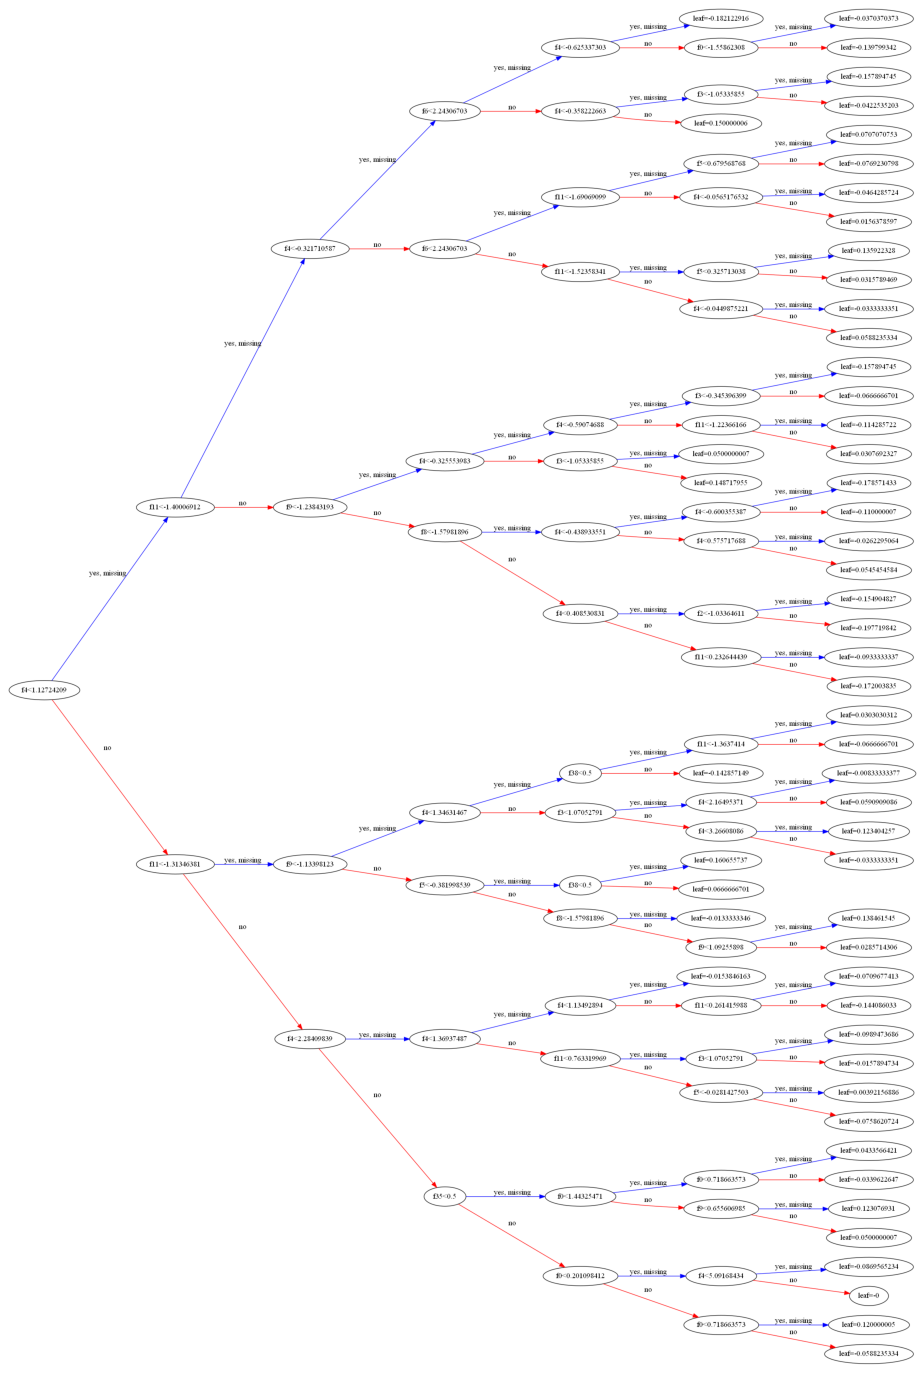

In [70]:
from xgboost import plot_tree
plot_tree(final_model,rankdir='LR')
plt.gcf().set_size_inches(25, 25)
plt.show()

### Model Inference

In [71]:
new_samp = {
    'age': 39,
    'job':'blue-collar',
    'marital':'single',
    'education':4, #basic.9y
    'default':'no',
    'housing':'no',
    'loan':'no',
    'contact':'telephone',
    'month':5, #may
    'day_of_week':2, #tuesday
    'duration':650,
    'campaign':3,
    'pdays':-1,
    'previous':0,
    'poutcome':'nonexistent',
    'emp.var.rate':1.1,
    'cons.price.idx':93.994,
    'cons.conf.idx':-36.4,
    'euribor3m':4.856,
    'nr.employed':5191.0
}
new_samp = pd.Series(new_samp)
new_samp = pd.DataFrame(new_samp)
new_samp = new_samp.T
new_samp

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,39,blue-collar,single,4,no,no,no,telephone,5,2,650,3,-1,0,nonexistent,1.1,93.994,-36.4,4.856,5191.0


In [72]:
samp_prepared = full_pipeline.transform(new_samp)
t0=time()
final_predict = final_model.predict(samp_prepared)
print(final_predict)
print(final_model.predict_proba(samp_prepared))
print('Time:',time() - t0)

[0]
[[0.80645895 0.19354104]]
Time: 0.01096796989440918


Hasil dari sample yang baru saya buat adalah 0 atau tidak subscribe dengan prediction probability 80.6% untuk no dan 19.4% untuk yes

### Pembuatan Final Pipeline

Lalu saya akan membuat pipeline baru yang nantinya akan di export dan digunakan dalam deployment saya untuk project Milestone ini. Saya akan menggabungkan antara pipeline pertama dengan classifier yang saya gunakan

In [73]:
from sklearn.pipeline import Pipeline
full_pipeline_with_predictor = Pipeline([
        ("preparation", full_pipeline),
        ("xgb_hyp", XGBClassifier(colsample_bytree=0.8,learning_rate=0.1,
                   min_child_weight = 2, n_estimators=50,subsample=0.5,random_state=42, verbosity = 0))
    ])
# full_pipeline.fit_transform(X_train)
# full_pipeline.transform(X_test)
full_pipeline_with_predictor.fit(X_train, y_train)
some_data = X_train.iloc[:5]
some_labels = y_train.iloc[:5]
print('Predicted Label :',full_pipeline_with_predictor.predict(some_data))
print('Actual Label :',some_labels.values)

Predicted Label : [0 0 0 0 0]
Actual Label : [0 0 0 0 0]


In [74]:
some_data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
36686,37,admin.,married,6,no,yes,no,telephone,6,5,145,1,-1,0,nonexistent,-2.9,92.963,-40.8,1.268,5076.2
26160,38,technician,married,7,no,yes,yes,cellular,11,3,11,3,-1,0,nonexistent,-0.1,93.200,-42.0,4.120,5195.8
31833,36,blue-collar,married,1,no,yes,no,cellular,5,4,349,1,-1,1,failure,-1.8,92.893,-46.2,1.327,5099.1
13014,28,services,married,5,no,yes,no,cellular,7,2,124,1,-1,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1
30115,23,management,single,6,no,yes,no,cellular,4,2,56,2,-1,0,nonexistent,-1.8,93.075,-47.1,1.384,5099.1


### Menyimpan Pipeline

In [75]:
my_model = full_pipeline_with_predictor
import joblib
joblib.dump(my_model, "final_model.pkl")
my_model_loaded = joblib.load("final_model.pkl")

### Overall Analysis

Model dengan nilai metrik tertinggi adalah XGBoost dengan tipe booster Gradient Boosting Tree, dan parameter sebagai berikut:
- base_score = 0.5
- colsample_bylevel = 1
- colsample_bynode = 1
- colsample_bytree = 0.8
- gamma = 0
- learning rate = -.1
- max depth = 6
- n_estimator = 50
- num_parallel_tree = 12
- objective = 'binary:logistic' <- dikarenakan bukan menyelesaikan multiclass problem

Dan XGBoost merupakan goodfit dikarenakan nilai dari rata-rata cross validation dan testing data nya hanya berbeda sedikit. Maka dari itu, saya menggunakan model dengan classifier XGBoost untuk saya deploy ke dashboard saya.
Dalam kasus ini, saya tetap menggunakan data full terbaru dengan kolom terbanyak agar dapat melihat gambaran yang lebih luas dengan jumlah kolom lebih banyak. Dan untuk classifier yang membutuhkan komputasi tinggi (seperti SVM) saya melakukan sampling sebanyak 10% Dengan jumlah target label 'yes' = 13% dan 'no' = 87%. 

*note: untuk model analysis, sudah saya markdown di setiap baris setelah classifier tersebut*